<a href="https://colab.research.google.com/github/suganya27302/Covid-19-Detection-Using-Chest-X-Rays/blob/main/Covid_19_detection_using_chest_X_rays_(model)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')   

Mounted at /content/drive


In [1]:
import keras
import matplotlib.pyplot as plt
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D,Dropout
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical

In [3]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="/content/drive/My Drive/COVID/TRAIN",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="/content/drive/My Drive/COVID/TEST", target_size=(224,224))

Found 4589 images belonging to 2 classes.
Found 542 images belonging to 2 classes.


In [4]:
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=16, input_shape=(224,224,3), kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))
model.add(Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))

# Max Pooling
model.add(MaxPool2D(pool_size=(64,64), strides=(2,2), padding="same"))
model.add(MaxPool2D(pool_size=(32,32), strides=(2,2), padding="same"))
model.add(MaxPool2D(pool_size=(16,16), strides=(2,2), padding="same"))
model.add(MaxPool2D(pool_size=(8,8), strides=(2,2), padding="same"))
model.add(MaxPool2D(pool_size=(4,4), strides=(2,2), padding="same"))

model.add(Flatten())
model.add(Dense(units = 288, activation = "relu"))
model.add(Dense(units = 64, activation = "relu"))
model.add(Dropout(0.2, input_shape=(64,)))
model.add(Dense(units = 32, activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 16)      2320      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 32)      4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 224, 224, 64)      18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 224, 224, 32)      18464     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0

In [5]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [7]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("covid_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=10,generator=traindata, validation_data= testdata, validation_steps=10,epochs=20,callbacks=[checkpoint,early])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
10/10 [==============================] - 298s 31s/step - loss: 1.9569 - accuracy: 0.5719 - val_loss: 1.1912 - val_accuracy: 0.4219

Epoch 00001: val_accuracy improved from -inf to 0.42188, saving model to covid_model.h5
Epoch 2/20
10/10 [==============================] - 246s 26s/step - loss: 0.8569 - accuracy: 0.6250 - val_loss: 0.6811 - val_accuracy: 0.5750

Epoch 00002: val_accuracy improved from 0.42188 to 0.57500, saving model to covid_model.h5
Epoch 3/20
10/10 [==============================] - 184s 18s/step - loss: 0.7455 - accuracy: 0.5875 - val_loss: 0.6400 - val_accuracy: 0.6281

Epoch 00003: val_accuracy improved from 0.57500 to 0.62813, saving model to covid_model.h5
Epoch 4/20
10/10 [==============================] - 145s 14s/step - loss: 0.6966 - accuracy: 0.6469 - val_loss: 0.6657 - val_accuracy: 0.6000

Epoch 00004: val_accuracy did not improve from 0.62813
Epoch 5/20
10/10 [==============================] - 132s 13s/step - loss: 0.6357 - accuracy: 0.6281 - v

In [8]:
model.save('covid_model.h5')

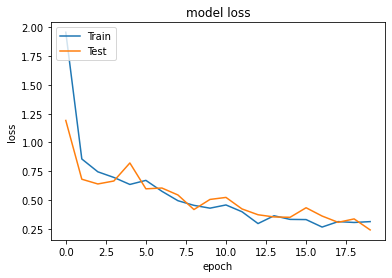

In [9]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

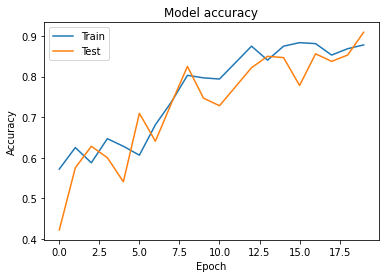

In [10]:
# Plot training & validation accuracy values
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()


Positive


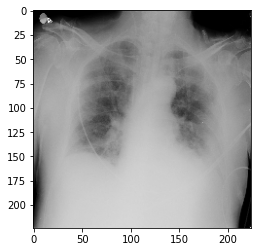

In [12]:
from keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/COVID/TEST/covid/13.jpg',target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("covid_model.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("Positive")
else:
    print('Negative')

In [13]:
label = testdata.classes

In [14]:
pred= model.predict(testdata)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (testdata.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class_indices]
print(predicted_class_indices)
print (labels)
print (predictions)

[0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1
 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 1
 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0
 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0
 1 1 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0
 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0
 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0
 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1
 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0
 0 1 1 1 0 1 1 0 0 1 1 1 

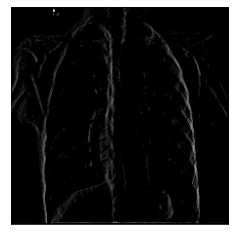

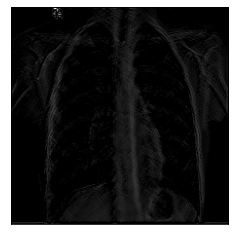

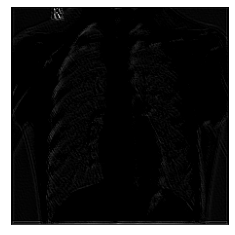

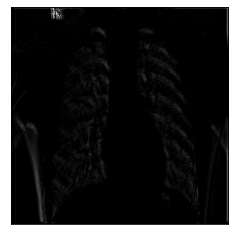

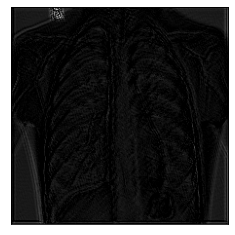

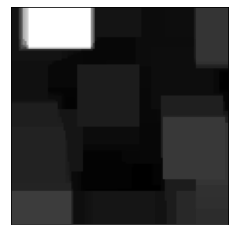

In [15]:
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
# redefine model to output right after the first hidden layer
ixs = [1, 2, 3, 4, 5,6]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
img = load_img('/content/drive/MyDrive/COVID/TEST/normal/0.jpeg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block
square = 1
for fmap in feature_maps:
    ix = 1
    for _ in range(square):
        ax = pyplot.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
        ix += 1
    pyplot.show()

In [17]:
from keras.preprocessing import image
import os
positive = 0
negative = 0
saved_model = load_model("covid_model.h5")
for dirname, _, filenames in os.walk('/content/drive/My Drive/COVID/TEST'):
    for filename in filenames:
        img = image.load_img(os.path.join(dirname, filename),target_size=(224,224))
        img = np.asarray(img)
        img = np.expand_dims(img, axis=0)
        output = saved_model.predict(img)
        if output[0][0] > output[0][1]:
            print("Positive")
            positive+=1
        else:
            print('Negative')
            negative+=1
print("Total Positive Predicted ->",positive)
print("Total Negative Predicted ->",negative)

Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
P

In [18]:
from keras.models import load_model
pos = 0
neg = 0
saved_model = load_model("covid_model.h5")
for dirname, _, filenames in os.walk('/content/drive/My Drive/COVID/TRAIN'):
    for filename in filenames:
        img = image.load_img(os.path.join(dirname, filename),target_size=(224,224))
        img = np.asarray(img)
        img = np.expand_dims(img, axis=0)
        output = saved_model.predict(img)
        if output[0][0] > output[0][1]:
            print("Positive")
            pos+=1
        else:
            print('Negative')
            neg+=1
print("Total Positive Predicted ->",pos)
print("Total Negative Predicted ->",neg)

Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
P

In [19]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(predicted_class_indices,label)
cf

array([[140, 138],
       [131, 133]])

In [20]:
import pandas as pd
exp_series = pd.Series(label)
pred_series = pd.Series(predicted_class_indices)
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,1,All
Actual,,,
0,140,131,271
1,138,133,271
All,278,264,542


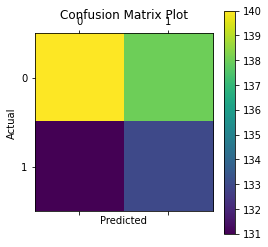

In [21]:
plt.matshow(cf)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();

In [22]:
print("accuracy", hist.history['accuracy'][-1])
print("val_accuracy", hist.history['val_accuracy'][-1])

accuracy 0.878125011920929
val_accuracy 0.909375011920929
